# Convolutional Neural Network

<h4> Sharat Karekaat </h4>

In [1]:
# Import Libraries

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

## Dataset - Fashion MNIST
- Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Labels

Each training and test example is assigned to one of the following labels:


    0 	T-shirt/top
    1 	Trouser
    2 	Pullover
    3 	Dress
    4 	Coat
    5 	Sandal
    6 	Shirt
    7 	Sneaker
    8 	Bag
    9 	Ankle boot

In [3]:
# Use the Fashion MNIST dataset  of Keras.

fmnist = tf.keras.datasets.fashion_mnist

(Xtrain, Ytrain), (Xtest,Ytest) = fmnist.load_data()

# Display size of dataset
Xtrain = Xtrain.reshape((60000,28,28,1))
Xtrain = Xtrain.astype('float32')/255

Xtest = Xtest.reshape((10000,28,28,1))
Xtest = Xtest.astype('float32')/255

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest) 

print(Xtrain.shape, Xtest.shape)
print(Ytrain.shape, Ytest.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


Fashion MNIST features grayscale images of 70,000 fashion products from 10 categories, with each image being 28x28 pixels. 

## Create a CNN Model

> MODEL - Conv >Conv >Max >Conv >Conv >Max >Flatten >Global Avg Pooling

In [4]:
# Create a Sequential model object
cnnModel = models.Sequential()

# Layer 1
cnnModel.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnnModel.add(layers.Conv2D(16, (3, 3), activation='relu'))

# Max pooling layer
cnnModel.add(layers.MaxPooling2D((2, 2)))

# Layer 2
cnnModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnnModel.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Max pooling layer
cnnModel.add(layers.MaxPooling2D((2, 2)))

# Global average pooling layer

#GlobalAveragePooling2D layer expects input data with four dimensions (batch size, height, width, channels),
#but it's receiving input data with only two dimensions (batch size, features). This mismatch was causing the error.

#To resolve this issue, the GlobalAveragePooling2D layer should receive input data with the correct shape. 
#This typically means that the Flatten layer should be removed to preserve the spatial dimensions of the data 
#before passing it to the GlobalAveragePooling2D layer.
cnnModel.add(layers.GlobalAveragePooling2D())

# Output layer
cnnModel.add(layers.Dense(10, activation='softmax'))

cnnModel.summary()

c:\Users\045sh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,338 (192.73 KB)

 Trainable params: 49,338 (192.73 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
cnnModel.compile(optimizer = "adam", loss = "categorical_crossentropy", 
                 metrics = ["accuracy"])


In [6]:
# train the model
h_model = cnnModel.fit(Xtrain, Ytrain, epochs = 25, 
                       batch_size = 64, validation_split = 0.1)

Epoch 1/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6007 - loss: 1.0785 - val_accuracy: 0.7652 - val_loss: 0.6038
Epoch 2/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7987 - loss: 0.5557 - val_accuracy: 0.8188 - val_loss: 0.5084
Epoch 3/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8330 - loss: 0.4699 - val_accuracy: 0.8422 - val_loss: 0.4473
Epoch 4/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8505 - loss: 0.4174 - val_accuracy: 0.8542 - val_loss: 0.4099
Epoch 5/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8633 - loss: 0.3787 - val_accuracy: 0.8600 - val_loss: 0.3841
Epoch 6/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8741 - loss: 0.3495 - val_accuracy: 0.8698 - val_loss: 0.3581
Epoch 7/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8808 - loss: 0.3260 - val_accuracy: 0.8762 - val_loss: 0.3437
Epoch 8/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8874 - loss: 0.3066 - val

In [7]:
print('Final training loss for Model \t', h_model.history['loss'][-1])
print('Final training accuracy for Model', h_model.history['accuracy'][-1])

Final training loss for Model 	 0.15555793046951294
Final training accuracy for Model 0.9449259042739868


## Results and Outputs

In [8]:
# testing the model
testLoss, testAccuracy = cnnModel.evaluate( Xtest, Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9067 - loss: 0.3058


In [9]:
print('Testing loss for Model\t', testLoss)
print('Testing accuracy for Model', testAccuracy)

Testing loss for Model	 0.302137553691864
Testing accuracy for Model 0.9052000045776367


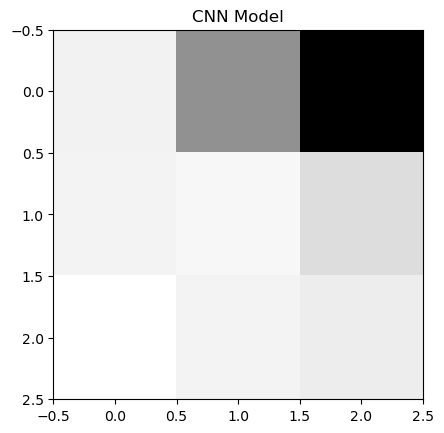

In [10]:
# shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.title('CNN Model')
plt.show()

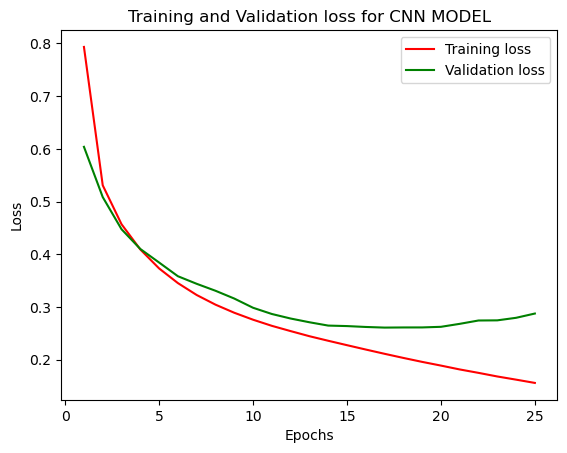

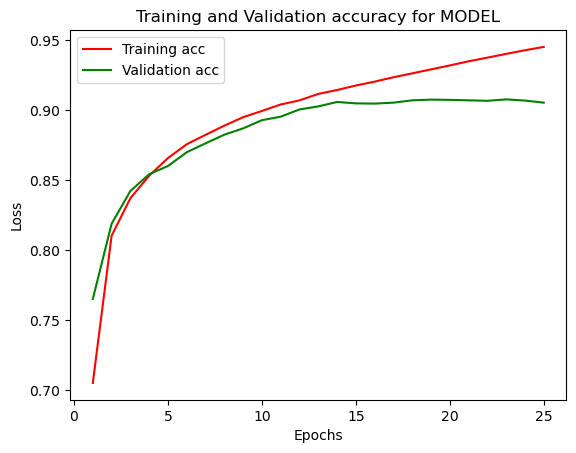

In [11]:
# plotting training and validation loss for Model

loss = h_model.history['loss']
val_loss = h_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss for CNN MODEL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = h_model.history['accuracy']
val_acc = h_model.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy for MODEL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Confusion Matrix Generation

### Prediction for a specific testing data generate confusion matrix

In [15]:
ypred_model = cnnModel.predict(Xtest)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(ypred_model, axis = 1)

Y_true = np.argmax(Ytest,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.88      0.86      1000
           3       0.90      0.91      0.90      1000
           4       0.85      0.82      0.84      1000
           5       0.95      0.99      0.97      1000
           6       0.75      0.71      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



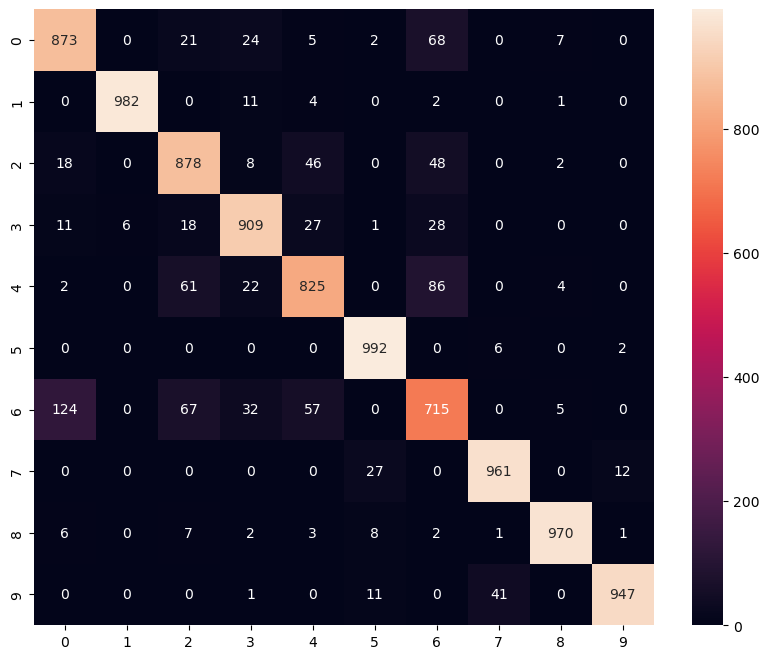

In [19]:
# compute the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

Now we shall download an image from online and preprocess it as per fashion mnist dataset and see if our models correctly predicts it

In [56]:
import cv2  # OpenCV for image processing
# Load the downloaded image
image1 = cv2.imread('pant.jpg')
image2 = cv2.imread('sneaker.jpg')
# Convert the image to grayscale (Fashion MNIST is grayscale)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# Resize the image to 28x28 pixels (same as Fashion MNIST images)
image1 = cv2.resize(image1, (28, 28))
image1 = image1 / 255.0
image2 = cv2.resize(image2, (28, 28))
image2 = image2 / 255.0
#Negative of the image
image1 = 1- image1
image2 = 1- image2

Text(0.5, 1.0, 'Processed Image 2')

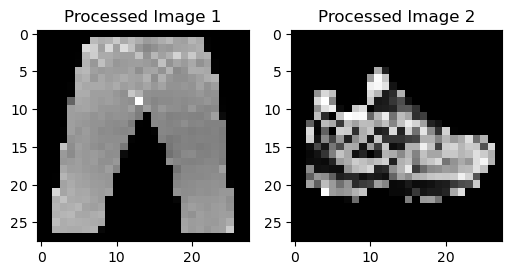

In [57]:
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(image1, cmap='gray')
plt.title("Processed Image 1")

plt.subplot(122)
plt.imshow(image2, cmap='gray')
plt.title("Processed Image 2")

In [58]:

# Reshape the image to match the input shape for the model (batch size, height, width, channels)
image1 = np.reshape(image1, (1, 28, 28, 1)) 
image2 = np.reshape(image2, (1, 28, 28, 1)) 

In [59]:
prediction1 = cnnModel.predict(image1)
prediction2 = cnnModel.predict(image2)

predicted_class_1 = np.argmax(prediction1)
predicted_class_2 = np.argmax(prediction2)

# Print the result
print(f"Predicted class for first image: {predicted_class_1}")
print(f"Predicted class for second image: {predicted_class_2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class for first image: 1
Predicted class for second image: 5


We can observe that the first image is correctly identified as Trousers, and the second image is almost identified correctly as sandals, though they are sneakers. 